# 对数几率回归模型概念

## 对数几率函数

在线性回归模型中，预测值y往往是一个具体的实值，而在分类预测场景当中，一个具体的预测实值不足以形成最终的分类预测。因此我们可以考虑将线性回归模型产生的预测实值，转换为0/1等分类值。

单位阶跃函数(unit-step function)就是一种比较理想的分类函数:
$$
y = \left\{\begin{aligned}0,z<0 \\0.5,z=0\\1,z>0\end{aligned}\right.
\tag{1.1}
$$

单位阶跃函数即表示当预测值z大于零就判为正例，小于零则判为反例，预测值为临界值零则可任意判别。但是由于单位阶跃函数不连续，不能作为广义线性回归模型的联系函数

$$
y = g^{-1}(\omega^{T}x+b)         
\tag{1.2}
$$

<font color=#999AAA >即$g(·)$函数的连续性需与$\omega^{T}x+b$保持一致</font>

在这里考虑用一个无限接近单位近阶跃函数的连续函数来代替单位阶跃函数，并希望它单调可微(与线性回归模型保持一致)。而对数几率函数(logistic function)正是这样一个常用的替代函数。
$$
y = \frac{1}{1+e^{-z}} 
\tag{1.3}
$$

对数几率函数是一种Sigmoid函数，它将z值转化为一个接近0或者1的y值。将对数几率函数代入广义线性模型得到
$$
y =  \frac{1}{1+e^{-(\omega^Tx+b)}} 
\tag{1.4}
$$

该式可变化为
$$
ln\frac{y}{1-y}= \omega^Tx+b
\tag{1.5}
$$

若将y视为样本作为正例的可能性，则1-y是其反例的可能性，两者的比值称为“几率”，反映了样本作为正例的相对可能性.
$$
\frac{y}{1-y} 
\tag{1.6}
$$

对几率取对数则可得到“对数几率”
$$
ln\frac{y}{1-y}
\tag{1.7}
$$


对数几率回归实际上是在用线性回归模型的预测结果去逼近真实标记的对数几率

特别需要注意到，虽然它的名字是“回归”，但实际上是一种分类学习方法。对数回归求解的目标函数是任意阶可导的凸函数。

## 参数求解

要确定线性回归模型中的$\omega$和$b$，将式(1.5)中的y视为后验概率估计$p(y=1 | x)$, 即式子可重写为

$$
ln\frac{p(y=1|x)}{p(y=0|x)}=\omega^{T}x + b
\tag{1.8}
$$
后验概率在这里可以理解为已知样本x，其为正例或者反例的概率

对式子1.8进行变式
$$
\begin{aligned}
\frac{p(y = 1| x)}{1-p(y=1|x)}&=e^{\omega^Tx+b}
\end{aligned}
$$

最终得到
$$
\begin{aligned}
p(y=1|x)&=\frac{e^{\omega^{T}x+b}}{1+e^{\omega^{T}x+b}}   (1.9)
\end{aligned}
$$

$$\begin{aligned}
p(y=0|x)&=\frac{1}{1+e^{\omega^{T}x+b}}(1.10)
\end{aligned}$$

### 对率回归模型最大化对数似然

最大似然估计的基本思想为：在已知实验结果以及模型分布的情况下，找出让该实验结果发生概率最大时的参数值。

应用到对率回归模型中，给定的数据集即为已知的实验结果，而每一个样本发生的概率也由式1.9和式1.10给出，对该对率回归模型作最大化似然估计，其中m为数据集中样本的个数：
$$
l(\omega,b)=\sum_{i=1}^{m}p(y_i|x_i;\omega,b)\tag{2.1}
$$
式1.9和式1.10中涉及指数运算，为了让运算过程变得简单且不影响其单调性，对最大似然函数取对数,实现“对数似然”
$$
l(\omega,b)=\sum_{i=1}^{m}\ln p(y_i|x_i;\omega,b)\tag{2.2}
$$
对率回归模型中的参数$\omega$和$b$的取值要使式2.2中的值达到最大值，即令每个样本属于其真实标记的概率越大越好

为了便于讨论，令$\beta=(\omega;b)$,$\hat{x}=\left(x;1\right)$，则$\omega x+b$可简写为$\beta^{T}\hat{x}$. 再令$p_{1}\left(\hat{x};\beta\right)=p(y=1|\hat{x};\beta)$，$p_{0}\left(\hat{x};\beta\right)=1 - p(y=1|\hat{x};\beta)$，则式2.2中的似然项可重写为
$$
p(y_i|x_i;\omega,b)=y_{i}p_{1}(\hat{x}_{i};\beta) + (1-y_{i})p_{0}(\hat{x}_{i};\beta)\tag{2.3}
$$

将式2.3代入式2.2，并根据式1.9和式1.10，推导出演算过程
$$\begin{aligned}
\ln p(y_i|x_i;\omega,b)&=ln(\frac{y_{i}\cdot e^{\beta^{T}x}}{1+e^{\beta^{T}\hat{x}}}+(1-y_{i})\cdot\frac{1}{1+e^{\beta^{T}\hat{x}}})\\
&=ln(\frac{y_{i}\cdot e^{\beta^{T}\hat{x}}+(1-y_{i})}{1+e^{\beta^{T}\hat{x}}})\\
&=y_{i}\cdot ln(e^{\beta^{T}\hat{x}}) - ln(1+e^{\beta^{T}\hat{x}})\\
&=y_{i}\cdot\beta^{T}\hat{x} - ln(1+e^{\beta^{T}\hat{x}})
\end{aligned}$$

需要对演算过程中注意的是对$1-y_{i}$的化简，对$y_{i}$考虑两种情况分别为0和1
当$y_{i}=1$时, $1-y_{i}=0$
$$
y_{i}\cdot e^{\beta^{T}\hat{x}}+(1-y_{i})=y_{i}\cdot e^{\beta^{T}\hat{x}}\tag{2.5}
$$
 当$y_{i}=0$时，$y_{i}\cdot e^{\beta^{T}\hat{x}}+(1-y_{i})$项整体为0， 即式2.5成立
 
 已知求最大值即求其相反数的最小值，对算式2.4取相反数并代入式2.2可得：
$$
l(\beta)=\sum_{1}^{m}-y_{i}\cdot\beta^{T}\hat{x} + ln(1+e^{\beta^{T}\hat{x}})\tag{2.6}
$$

# 对数几率回归模型实现

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# load dataset
data_file = './data/watermelon_data.csv'
data = np.loadtxt(data_file, skiprows=1, delimiter=",")
print(data)

[[ 1.     0.697  0.46   1.   ]
 [ 2.     0.774  0.376  1.   ]
 [ 3.     0.634  0.264  1.   ]
 [ 4.     0.608  0.318  1.   ]
 [ 5.     0.556  0.215  1.   ]
 [ 6.     0.403  0.237  1.   ]
 [ 7.     0.481  0.149  1.   ]
 [ 8.     0.437  0.211  1.   ]
 [ 9.     0.666  0.091  0.   ]
 [10.     0.243  0.267  0.   ]
 [11.     0.245  0.057  0.   ]
 [12.     0.343  0.099  0.   ]
 [13.     0.639  0.161  0.   ]
 [14.     0.657  0.198  0.   ]
 [15.     0.36   0.37   0.   ]
 [16.     0.593  0.042  0.   ]
 [17.     0.719  0.103  0.   ]]


In [3]:
# get data
X = data[:,1:3] # 取数据集中的密度和含糖率两列
y = data[:,3:] # 取数据集中的好瓜判断一列
X0 = np.ones(np.shape(X)[0]) # 生成相同行数的数据1
X = np.c_[X, X0.T] # 生成矩阵(xi, 1)

## 梯度下降实现对率回归

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z)) 

def function_l(dataset_n, beta_T_X, y):
    l_value = 0
    for i in range(dataset_n):
        p = -y[i]*beta_T_X[i] + np.log(1+np.exp(beta_T_X[i]))
        l_value += p
    return l_value

def gradient_function_l(beta_T_X, X, y):
    """The gradient of function l"""
    p1 = np.exp(beta_T_X) /  (1 + np.exp(beta_T_X))
    return -np.sum(X * (y-p1), axis=0, keepdims=True)

def gradient_descent(tranning_times=500):
    """Perform gradient descent"""
    dataset_n = np.shape(X)[0]
    # init alpha
    alpha = 0.01
    # init beta
    beta = np.zeros((1,3))
    for i in range(tranning_times):
        # (x, beta)
        beta_T_X = np.dot(X, beta.T)
        # cal gradient value
        gradient = gradient_function_l(beta_T_X, X ,y)
        # update beta value
        beta = beta - alpha * gradient
    return beta

### 分类结果

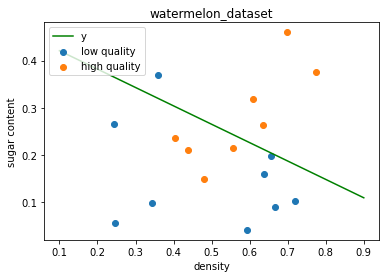

In [10]:
w1, w2,b = gradient_descent().tolist()[0]

def function_y(x):
    return (-b-w1*x)/w2

y_0 = y==0
y_1 = y==1

plt.title('watermelon_dataset')
plt.xlabel('density')
plt.ylabel('sugar content')
plt.scatter(X[y_0[:,0],0], X[y_0[:,0], 1], label = 'low quality')
plt.scatter(X[y_1[:,0],0], X[y_1[:,0], 1], label = 'high quality')
left_point = function_y(0.1)
right_point = function_y(0.9)
plt.plot([0.1, 0.9], [left_point, right_point], label='y', color='green')
plt.legend(loc="upper left")
plt.show()

## 牛顿法实现对率回归

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def func_l(beta_T_X, y):
    return -np.sum(-y*beta_T_X + np.log(1+np.exp(beta_T_X)))

def fun_first_derivative(beta_T_X, X, y):
    """First derivative of function l"""
    p1 = np.exp(beta_T_X)/(1 + np.exp(beta_T_X))
    return -np.sum(X * (y-p1), 0, keepdims=True)

def fun_second_derivative(beta_T_X, X):
    """Second derivative of function l"""
    p1 = np.exp(beta_T_X)/(1 + np.exp(beta_T_X))
    N = len(X)
    p = np.diag((p1*(1-p1)).reshape(N))
    return X.T.dot(p).dot(X)

def newton_method():
    """Perform newton method"""
    # init beta
    beta = np.ones((1,3))
    beta_T_X = np.dot(X, beta.T)
    # cal gk
    old_l = 0
    new_l = func_l(beta_T_X, y)
    while np.abs(new_l - old_l) > 1e-5:
        first_d = fun_first_derivative(beta_T_X, X, y)
        print(f'first_d : {first_d}')
        second_d = fun_second_derivative(beta_T_X, X)
        print(f'second_d : {second_d}')
        beta = beta - first_d.dot(np.linalg.inv(second_d))
        beta_T_X = np.dot(X, beta.T)
        old_l = new_l
        new_l = func_l(beta_T_X, y)
    return beta

newton_method()

first_d : [[3.16583886 0.8786374  6.43813213]]
second_d : [[0.62521997 0.22944908 1.10706565]
 [0.22944908 0.1148862  0.43509314]
 [1.10706565 0.43509314 2.16285971]]
first_d : [[-1.3525372  -0.4483349  -2.35290185]]
second_d : [[0.65823726 0.28104022 1.15924831]
 [0.28104022 0.14652463 0.53896755]
 [1.15924831 0.53896755 2.21526198]]
first_d : [[0.75759242 0.13963715 1.29852247]]
second_d : [[0.99415716 0.33448266 1.74908216]
 [0.33448266 0.15843369 0.65185614]
 [1.74908216 0.65185614 3.33228591]]
first_d : [[0.05006579 0.00297553 0.09870581]]
second_d : [[0.90292573 0.31620223 1.58329426]
 [0.31620223 0.14975183 0.61396799]
 [1.58329426 0.61396799 2.99801561]]
first_d : [[ 0.00083302 -0.00024955  0.00223159]]
second_d : [[0.87543256 0.30726735 1.53655584]
 [0.30726735 0.14532179 0.59827331]
 [1.53655584 0.59827331 2.91074012]]
first_d : [[-2.91384685e-07 -1.20293246e-06  1.69379645e-06]]
second_d : [[0.8741882  0.30680752 1.53444214]
 [0.30680752 0.14508452 0.59747692]
 [1.53444214 0

array([[ 3.15832966, 12.52119579, -4.42886451]])

### 分类结果

first_d : [[3.16583886 0.8786374  6.43813213]]
second_d : [[0.62521997 0.22944908 1.10706565]
 [0.22944908 0.1148862  0.43509314]
 [1.10706565 0.43509314 2.16285971]]
first_d : [[-1.3525372  -0.4483349  -2.35290185]]
second_d : [[0.65823726 0.28104022 1.15924831]
 [0.28104022 0.14652463 0.53896755]
 [1.15924831 0.53896755 2.21526198]]
first_d : [[0.75759242 0.13963715 1.29852247]]
second_d : [[0.99415716 0.33448266 1.74908216]
 [0.33448266 0.15843369 0.65185614]
 [1.74908216 0.65185614 3.33228591]]
first_d : [[0.05006579 0.00297553 0.09870581]]
second_d : [[0.90292573 0.31620223 1.58329426]
 [0.31620223 0.14975183 0.61396799]
 [1.58329426 0.61396799 2.99801561]]
first_d : [[ 0.00083302 -0.00024955  0.00223159]]
second_d : [[0.87543256 0.30726735 1.53655584]
 [0.30726735 0.14532179 0.59827331]
 [1.53655584 0.59827331 2.91074012]]
first_d : [[-2.91384685e-07 -1.20293246e-06  1.69379645e-06]]
second_d : [[0.8741882  0.30680752 1.53444214]
 [0.30680752 0.14508452 0.59747692]
 [1.53444214 0

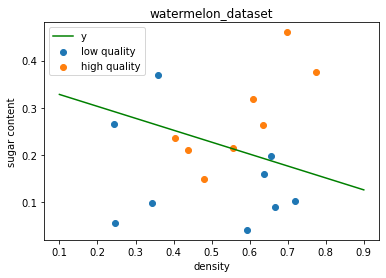

In [11]:
w1, w2,b = newton_method().tolist()[0]

def function_y(x):
    return (-b-w1*x)/w2

y_0 = y==0
y_1 = y==1

plt.title('watermelon_dataset')
plt.xlabel('density')
plt.ylabel('sugar content')
plt.scatter(X[y_0[:,0],0], X[y_0[:,0], 1], label = 'low quality')
plt.scatter(X[y_1[:,0],0], X[y_1[:,0], 1], label = 'high quality')
left_point = function_y(0.1)
right_point = function_y(0.9)
plt.plot([0.1, 0.9], [left_point, right_point], label='y', color='green')
plt.legend(loc="upper left")
plt.show()